Connecting to google drive for direct access of dataset

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **CONVOLUTIONAL NEURAL NETWORK MODEL**

Importing necessary modules for performing functions

In [ ]:
# import modules

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import load_img
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from tensorflow.keras.utils import plot_model

Loading the dataset along with preprocessing images for a better clear image and splitting dataset into train and validation part

In [ ]:
# load dataset and set class labels

astronomy_data = '/content/drive/MyDrive/FinalProjectWork/TRAIN'
astronomy_class_labels = ['star', 'galaxy']



# preprocess images

star_galaxy_image_size = (64, 64)
astronomy_batch_size = 32

astronomy_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
astronomy_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 45,  # range of rotation angles (in degrees)
    zoom_range=0.2, # zooming image by 20%
    horizontal_flip=True, # flipping image horizontally
    validation_split=0.2 # split 20% of dataset into for validation
)



# train CNN model from dataset features

astronomy_train_generator = astronomy_datagen.flow_from_directory(
    astronomy_data,
    target_size=star_galaxy_image_size,
    batch_size=astronomy_batch_size,
    class_mode='binary',
    subset='training'
)

astronomy_validation_generator = astronomy_datagen.flow_from_directory(
    astronomy_data,
    target_size=star_galaxy_image_size,
    batch_size=astronomy_batch_size,
    class_mode='binary',
    subset='validation'
)

Found 3190 images belonging to 2 classes.
Found 796 images belonging to 2 classes.


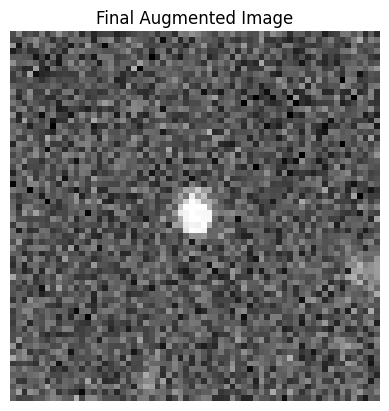

In [ ]:
augmented_img = astronomy_datagen.random_transform(astronomy_train_generator[0][0][0])
plt.imshow(augmented_img)
plt.title('Final Augmented Image')
plt.axis('off')
plt.show()


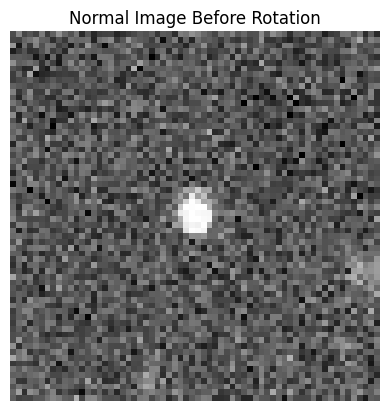

In [ ]:
# Assuming train_generator contains your normal star-galaxy images
normal_img = astronomy_train_generator[0][0][0]
plt.imshow(normal_img)
plt.title('Normal Image Before Rotation')
plt.axis('off')
plt.show()


In next step, CNN model is build by use of Dropout regulariser and displayed

In [ ]:
# CNN model build



# define input shape

input_shape = (star_galaxy_image_size[0], star_galaxy_image_size[1], 3)



# define input layer

inputs = layers.Input(shape=input_shape, name='Input')
conv_1 = layers.Conv2D(32, (3, 3), activation='relu', name='conv_1')(inputs)
pool_1 = layers.MaxPool2D(pool_size=(2, 2), name='MaxPool2D_1')(conv_1)
conv_2 = layers.Conv2D(64, (3, 3), activation='relu', name='conv_2')(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2), name='MaxPool2D_2')(conv_2)
conv_3 = layers.Conv2D(128,(3, 3), activation='relu', name='conv_3')(pool_2)
pool_3 = layers.MaxPool2D(pool_size=(2, 2), name='MaxPool2D_3')(conv_3)
flatten = layers.Flatten(name='flatten')(pool_3)
dense_1 = layers.Dense(128, activation='relu', name='dense_1')(flatten)
dropout = layers.Dropout(0.5, name='Dropout')(dense_1)
output = layers.Dense(1, activation='sigmoid', name='output')(dropout)



# define model

astronomy_model = models.Model(inputs=inputs, outputs=output, name='astronomy_model')



# display model

astronomy_model.summary()


Model: "astronomy_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64, 64, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 MaxPool2D_1 (MaxPooling2D)  (None, 31, 31, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 29, 29, 64)        18496     
                                                                 
 MaxPool2D_2 (MaxPooling2D)  (None, 14, 14, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 12, 12, 128)       73856     
                                                                 
 MaxPool2D_3 (MaxPooling2D)  (None, 6, 6, 128)     

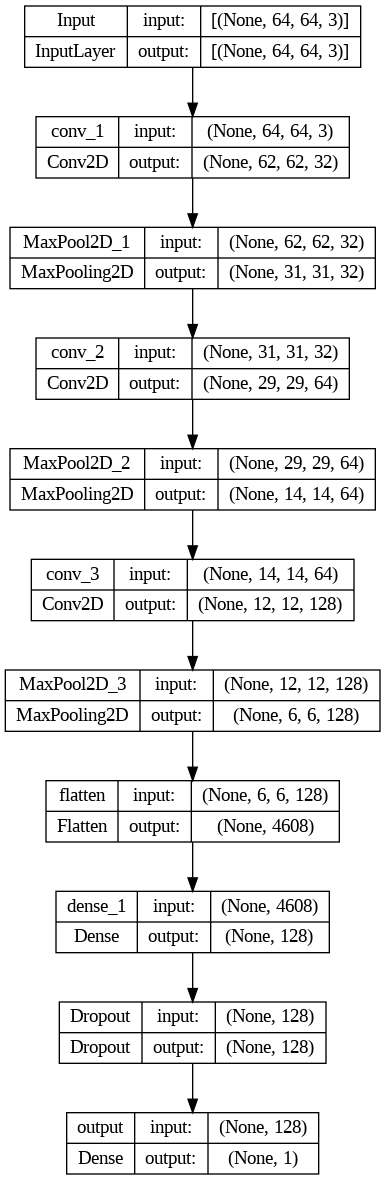

In [ ]:
# display CNN model

plot_model(astronomy_model, show_shapes=True, show_layer_names=True)

Now, the CNN model that was build above will be compiled and trained for 10 epochs

In [ ]:
# compile model

astronomy_model.compile(optimizer='Adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])



# run model with 10 epochs

history = astronomy_model.fit(
    astronomy_train_generator,
    steps_per_epoch = astronomy_train_generator.samples // astronomy_batch_size,
    epochs = 10,
    validation_data = astronomy_validation_generator,
    validation_steps = astronomy_validation_generator.samples // astronomy_batch_size
)

Epoch 1/10
99/99 [==============================] - 11s 89ms/step - loss: 0.5284 - accuracy: 0.7619 - val_loss: 0.4284 - val_accuracy: 0.7891
Epoch 2/10
99/99 [==============================] - 7s 73ms/step - loss: 0.3922 - accuracy: 0.8011 - val_loss: 0.3640 - val_accuracy: 0.8516
Epoch 3/10
99/99 [==============================] - 7s 72ms/step - loss: 0.3568 - accuracy: 0.8436 - val_loss: 0.4135 - val_accuracy: 0.8216
Epoch 4/10
99/99 [==============================] - 7s 75ms/step - loss: 0.3354 - accuracy: 0.8547 - val_loss: 0.3216 - val_accuracy: 0.8672
Epoch 5/10
99/99 [==============================] - 7s 73ms/step - loss: 0.3049 - accuracy: 0.8711 - val_loss: 0.2963 - val_accuracy: 0.8711
Epoch 6/10
99/99 [==============================] - 7s 71ms/step - loss: 0.2694 - accuracy: 0.8847 - val_loss: 0.2952 - val_accuracy: 0.8737
Epoch 7/10
99/99 [==============================] - 7s 71ms/step - loss: 0.2510 - accuracy: 0.8965 - val_loss: 0.2910 - val_accuracy: 0.8841
Epoch 8/10
9

Evaluating the model along with plotting accuracy and loss curves and values as well

Found 3986 images belonging to 2 classes.


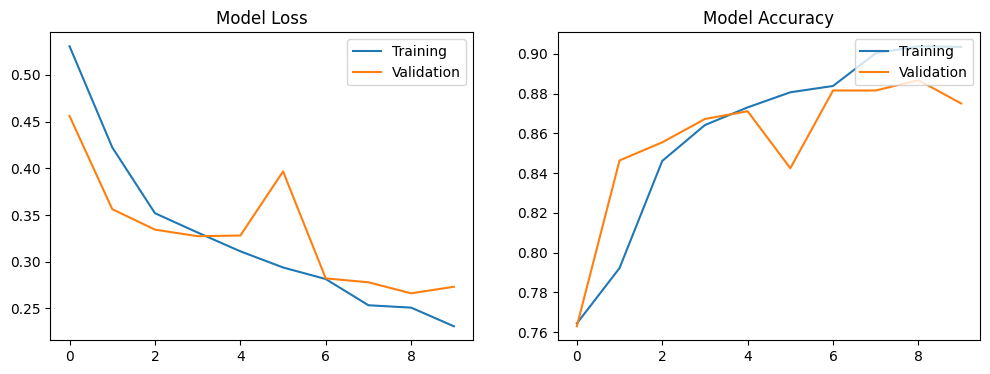

In [ ]:
# model evaluation

astronomy_test_generator = astronomy_datagen.flow_from_directory(
    astronomy_data,
    target_size=star_galaxy_image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)



# plot accuracy and loss curves

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# display loss and accuracy of cnn model

astronomy_loss, astronomy_accuracy = astronomy_model.evaluate(astronomy_test_generator)
print(f"CNN Model Loss: {astronomy_loss:.2f}")
print(f"CNN Model Accuracy: {astronomy_accuracy:.2f}")

125/125 [==============================] - 7s 58ms/step - loss: 0.2052 - accuracy: 0.9190
CNN Model Loss: 0.21
CNN Model Accuracy: 0.92


Here, the prediction of classified images is performed and correctly classified images are displayed along with their labels

1/1 [==============================] - 0s 105ms/step


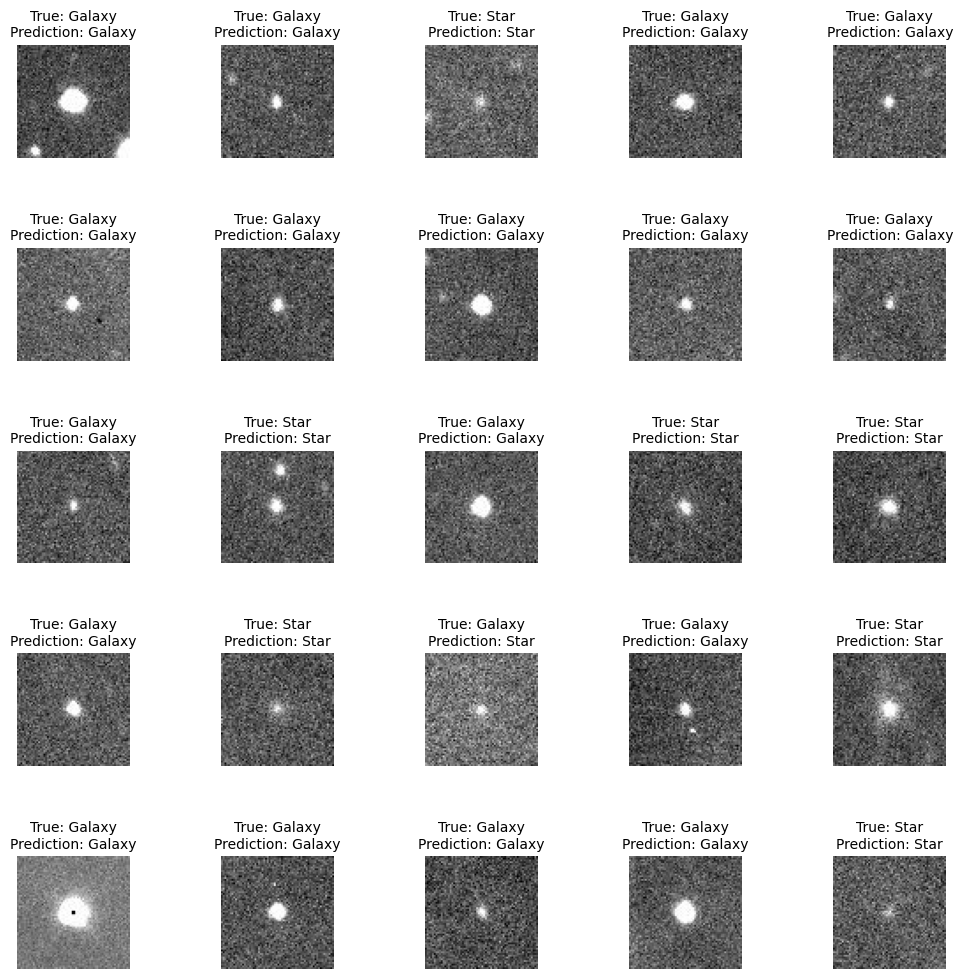

In [ ]:
# display correctly classified images

x_test, y_test = astronomy_validation_generator.next()
y_pred = astronomy_model.predict(x_test)

fig, axes = plt.subplots(5, 5, figsize=(12, 12))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i, ax in enumerate(axes.flat):
  ax.imshow(x_test[i])
  if y_pred[i][0] < 0.5: # set conditions for classification of stars and galaxies
    predict_label = 'Star'
  else:
    predict_label = 'Galaxy'

  if y_test[i] == 0:
    true_label = 'Star'
  else:
    true_label = 'Galaxy'

  title = f'True: {true_label}\nPrediction: {predict_label}'
  ax.set_title(title, fontsize=10)
  ax.axis('off')
plt.show()

Performing metrics insights like Precision, Recall, F1-score, Confusion Matrix and AUC ROC Curve on CNN model

125/125 [==============================] - 7s 56ms/step
Confusion Matrix of CNN is:  [[ 779  163]
 [  95 2949]]
Precision of CNN is:  0.9476221079691517
Recall of CNN is:  0.9687910643889619
F1 score of CNN is:  0.9580896686159845


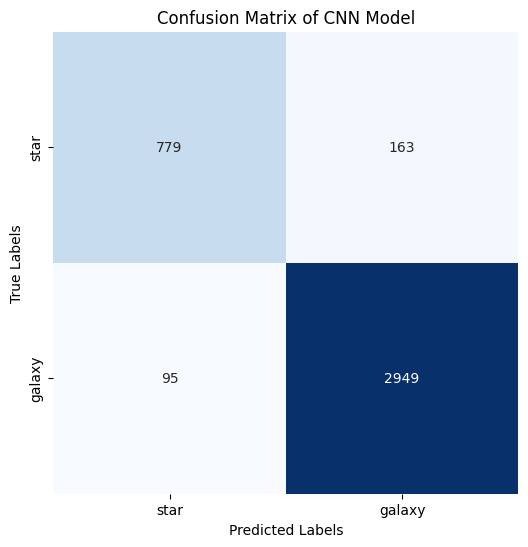

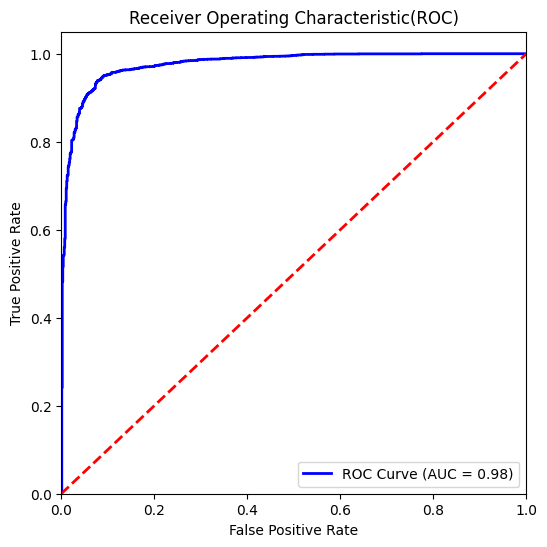

In [ ]:
# evaluate model

y_true = astronomy_test_generator.classes
y_pred = astronomy_model.predict(astronomy_test_generator)
y_pred_classes = np.round(y_pred).flatten().astype(int)



# computing confusion matrix

astronomy_cm = confusion_matrix(y_true, y_pred_classes)



# calculating other metrics

astronomy_precision = precision_score(y_true, y_pred_classes)
astronomy_recall = recall_score(y_true, y_pred_classes)
astronomy_f1 = f1_score(y_true, y_pred_classes)



# display values of metrics

print("Confusion Matrix of CNN is: ", astronomy_cm)
print("Precision of CNN is: ", astronomy_precision)
print("Recall of CNN is: ", astronomy_recall)
print("F1 score of CNN is: ", astronomy_f1)



# plot confusion matrix

plt.figure(figsize=(6, 6))
sns.heatmap(astronomy_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=astronomy_class_labels, yticklabels=astronomy_class_labels)
plt.title("Confusion Matrix of CNN Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



# plt ROC curve

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
astronomy_roc_auc = roc_auc_score(y_true, y_pred)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label="ROC Curve (AUC = %0.2f)" % astronomy_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.legend(loc="lower right")
plt.show()


## **RANDOM FOREST CLASSIFIER MODEL**

Importing necessary modules

In [ ]:
# import modules

import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import random

Dataset is loaded by use of function along with changing images to grayscale and extracting features from them

In [ ]:
# load dataset

def astronomy_load_data(image_dir):
  X_astronomy_data = []
  y_astronomy_label = []
  astronomy_classes = os.listdir(image_dir)
  for astronomy_class_name in astronomy_classes:
    astronomy_class_path = os.path.join(image_dir, astronomy_class_name)
    if os.path.isdir(astronomy_class_path):
      astronomy_class_label = 0 if astronomy_class_name == "star" else 1
      for image_file in os.listdir(astronomy_class_path):
        astronomy_image_path = os.path.join(astronomy_class_path, image_file)
        astronomy_image = Image.open(astronomy_image_path).convert('L') # convert image to grayscale
        astronomy_image_array = np.array(astronomy_image)
        X_astronomy_data.append(astronomy_image_array.flatten()) # flattening the image for creating feature vectors
        y_astronomy_label.append(astronomy_class_label)
  return np.array(X_astronomy_data), np.array(y_astronomy_label)

astronomy_image_dir = '/content/drive/MyDrive/FinalProjectWork/TRAIN'
X_astronomy_data, y_astronomy_label = astronomy_load_data(astronomy_image_dir)

RF classifier model is trained with test size of 20% and remaining 80% is used for training purposes

In [ ]:
# train the RF model

X_train, X_test, y_train, y_test = train_test_split(X_astronomy_data,
                                                    y_astronomy_label,
                                                    test_size=0.2,
                                                    random_state=42)

The model is built with 100 number of trees so that proper feature extraction is performed

In [ ]:
# build RF model

astronomy_rf = RandomForestClassifier(n_estimators=100, random_state=42)
astronomy_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

RF classifier model evaluation is done in following part of code and classification report containing Precision, Recall, F1-score and Support has been generated

In [ ]:
# evaluate RF model



# predict the outcome
astronomy_y_pred = astronomy_rf.predict(X_test)



# calculate RF model accuracy

astronomy_rf_accuracy = accuracy_score(y_test, astronomy_y_pred)
print("RF Model Accuracy is: ", astronomy_rf_accuracy)



# calculate RF model classification report

astronomy_class_report = classification_report(y_test, astronomy_y_pred)
print("RF Model Classification Report: \n", astronomy_class_report)

RF Model Accuracy is:  0.7518796992481203
RF Model Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.99      0.86       597
           1       0.62      0.04      0.07       201

    accuracy                           0.75       798
   macro avg       0.68      0.52      0.47       798
weighted avg       0.72      0.75      0.66       798



Along with this, Confusion Matrix has been plotted

RF Model Confusion Matrix: 
 [[592   5]
 [193   8]]




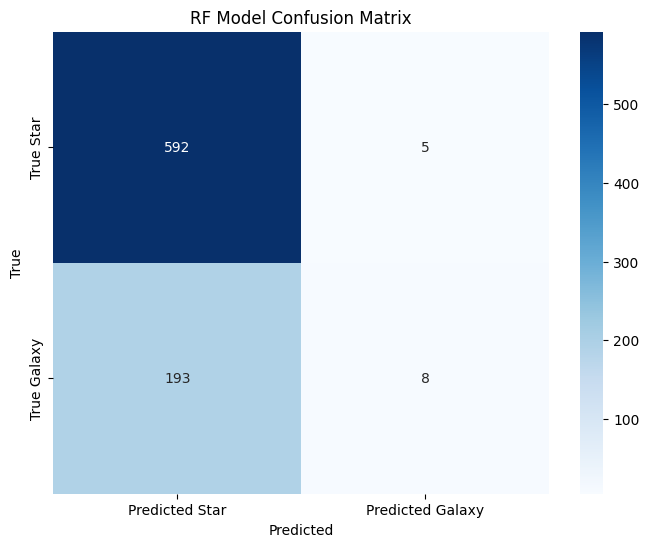

In [ ]:
# calculate and display confusion matrix

astronomy_confusion_matrix = confusion_matrix(y_test, astronomy_y_pred)
print("RF Model Confusion Matrix: \n", astronomy_confusion_matrix)
print("\n") # extra space below after confusion matrix



# plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(astronomy_confusion_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("RF Model Confusion Matrix")
plt.xticks([0.5, 1.5], ["Predicted Star", "Predicted Galaxy"]) # set position for "x" labels
plt.yticks([0.5, 1.5], ["True Star", "True Galaxy"]) # set position for "y" labels
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Randomly classified images has been displayed along with labels on top of them

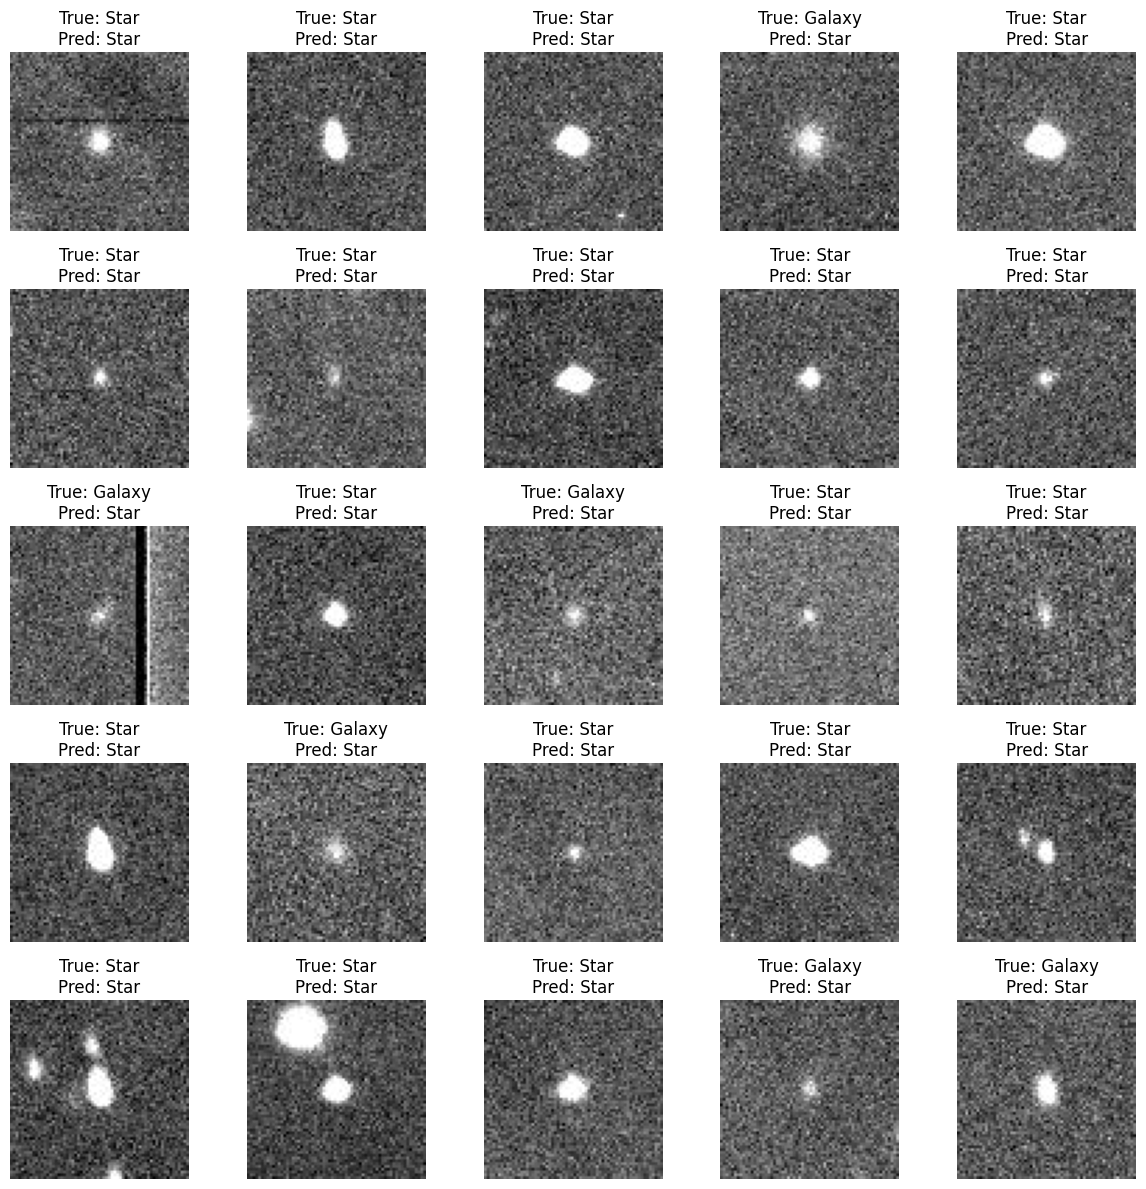

In [ ]:
# display correctly classified images



# randomly select subest for display of images
astronomy_samples = 25
random_indices = random.sample(range(len(y_test)), astronomy_samples)
astronomy_X = X_test[random_indices]
astronomy_y_true = y_test[random_indices]
astronomy_y_visualize_pred = astronomy_y_pred[random_indices]



# list for storing correctly classfied images

rf_correctly_classified = []



# interpret image shape from dataset

rf_image_shape = (int(np.sqrt(X_astronomy_data.shape[1])),
                  int(np.sqrt(X_astronomy_data.shape[1])))



# display samples with labels

plt.figure(figsize=(12, 12))
for i in range(astronomy_samples):
  plt.subplot(5, 5, i + 1)
  plt.imshow(astronomy_X[i].reshape(rf_image_shape), cmap="gray")
  plt.title(f"True: {'Star' if astronomy_y_true[i] == 0 else 'Galaxy'}\nPred: {'Star' if astronomy_y_pred[i] == 0 else 'Galaxy'}")
  plt.axis('off')
  if astronomy_y_true[i] == astronomy_y_pred[i]:
    rf_correctly_classified.append(i)

plt.tight_layout()
plt.show()

AUC ROC curve is displayed which depicts the behaviour and accuracy of the model overall

<function matplotlib.pyplot.show(close=None, block=None)>

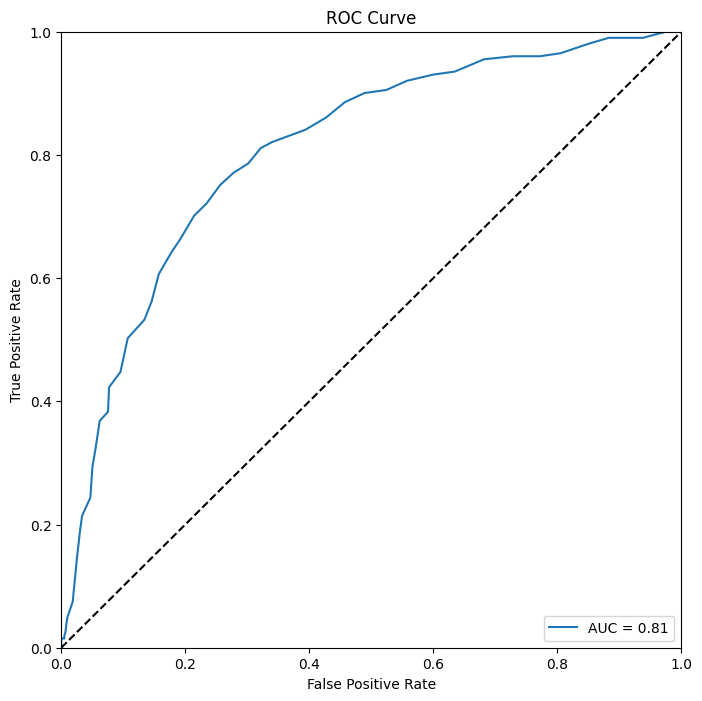

In [ ]:
# display AUC ROC Curve for RF Model



# calculate predicted probabilties for positive class

rf_y_pred_prob = astronomy_rf.predict_proba(X_test)[:, 1]



# calculate ROC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,
                                                                rf_y_pred_prob)



# Calculate AUC for ROC Curve

rf_auc = roc_auc_score(y_test, rf_y_pred_prob)



# plot the results

plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, label=f'AUC = {rf_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show